# Purpose of Notebook

This notebook was used to test and develop the linear regression machine learning model for Data Miners Group project

The goal of the notebook is to develop a linear regression machine learning model that will prediction changes in the target data when input the available feature data from the model_df dataset.

model_df dataset is created using the data_miner_preprocessing_AWS notebook.

#Initial Imports & Preparing Model Dataframe

In [1]:
# Initial imports
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score, max_error, mean_absolute_error, mean_squared_error, r2_score 

data = ('/content/model_df.csv')
model_df = pd.read_csv(data)

In [2]:
# change zip code to string and reformat
model_df['ZIP_CODE'] = model_df['ZIP_CODE'].apply(lambda x: '0' + str(x) if x < 10000 else str(x))

# set ZIP_CODE as index
model_df = model_df.set_index('ZIP_CODE')

model_df.head()

,EV_LEVEL_1,EV_LEVEL_2,EV_FAST,NETWORK_TYPE_ChargePoint,NETWORK_TYPE_Non_Networked,NETWORK_TYPE_Other_Network,TOTAL_HOUSEHOLDS,MEDIAN_INCOME,REG_COUNTS
ZIP_CODE,,,,,,,,,
03266,0,2,0,0,1,0,851.0,54904.0,0
07001,0,1,0,0,1,0,5022.0,69849.0,173
07003,0,12,5,4,1,3,18577.0,78034.0,800
07004,0,6,3,0,1,2,2621.0,122063.0,308
07005,0,1,10,0,1,1,5489.0,111946.0,446


In [3]:
model_df['EV_TOTAL'] = model_df.iloc[:, -9:-7].sum(axis=1)
model_df = model_df[['EV_LEVEL_1', 'EV_LEVEL_2', 'EV_FAST', 'EV_TOTAL',
                     'NETWORK_TYPE_ChargePoint',	'NETWORK_TYPE_Non_Networked',	'NETWORK_TYPE_Other_Network',
                     'TOTAL_HOUSEHOLDS',	'MEDIAN_INCOME',
                     'REG_COUNTS']]
model_df

,EV_LEVEL_1,EV_LEVEL_2,EV_FAST,EV_TOTAL,NETWORK_TYPE_ChargePoint,NETWORK_TYPE_Non_Networked,NETWORK_TYPE_Other_Network,TOTAL_HOUSEHOLDS,MEDIAN_INCOME,REG_COUNTS
ZIP_CODE,,,,,,,,,,
03266,0,2,0,2,0,1,0,851.0,54904.0,0
07001,0,1,0,1,0,1,0,5022.0,69849.0,173
07003,0,12,5,12,4,1,3,18577.0,78034.0,800
07004,0,6,3,6,0,1,2,2621.0,122063.0,308
07005,0,1,10,1,0,1,1,5489.0,111946.0,446
...,...,...,...,...,...,...,...,...,...,...
99352,0,13,3,13,1,1,4,12877.0,81410.0,3413
99354,36,48,0,84,0,45,1,9175.0,73369.0,2082
99361,0,1,0,1,0,0,1,750.0,69118.0,100


# Statistical Analysis of Dataset

In [4]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2493 entries, 03266 to 99403
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   EV_LEVEL_1                  2493 non-null   int64  
 1   EV_LEVEL_2                  2493 non-null   int64  
 2   EV_FAST                     2493 non-null   int64  
 3   EV_TOTAL                    2493 non-null   int64  
 4   NETWORK_TYPE_ChargePoint    2493 non-null   int64  
 5   NETWORK_TYPE_Non_Networked  2493 non-null   int64  
 6   NETWORK_TYPE_Other_Network  2493 non-null   int64  
 7   TOTAL_HOUSEHOLDS            2493 non-null   float64
 8   MEDIAN_INCOME               2493 non-null   float64
 9   REG_COUNTS                  2493 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 214.2+ KB


In [5]:
model_df.describe()

,EV_LEVEL_1,EV_LEVEL_2,EV_FAST,EV_TOTAL,NETWORK_TYPE_ChargePoint,NETWORK_TYPE_Non_Networked,NETWORK_TYPE_Other_Network,TOTAL_HOUSEHOLDS,MEDIAN_INCOME,REG_COUNTS
count,2493.000000,2493.000000,2493.000000,2493.000000,2493.000000,2493.000000,2493.000000,2493.000000,2493.000000,2493.000000
mean,0.279182,8.221019,1.715604,8.500201,2.022062,0.697152,1.468111,8606.855195,73166.091456,963.609707
std,2.064343,14.277310,3.838397,14.614100,4.819944,1.474278,2.382783,6846.422036,30414.784624,1919.669506
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,10804.000000,0.000000
25%,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,3047.000000,52492.000000,78.000000
50%,0.000000,4.000000,0.000000,4.000000,1.000000,0.000000,1.000000,7538.000000,65906.000000,303.000000
75%,0.000000,9.000000,1.000000,9.000000,2.000000,1.000000,2.000000,12502.000000,87311.000000,1038.000000
max,48.000000,227.000000,38.000000,227.000000,85.000000,45.000000,29.000000,41355.000000,240507.000000,29672.000000


<function matplotlib.pyplot.show>

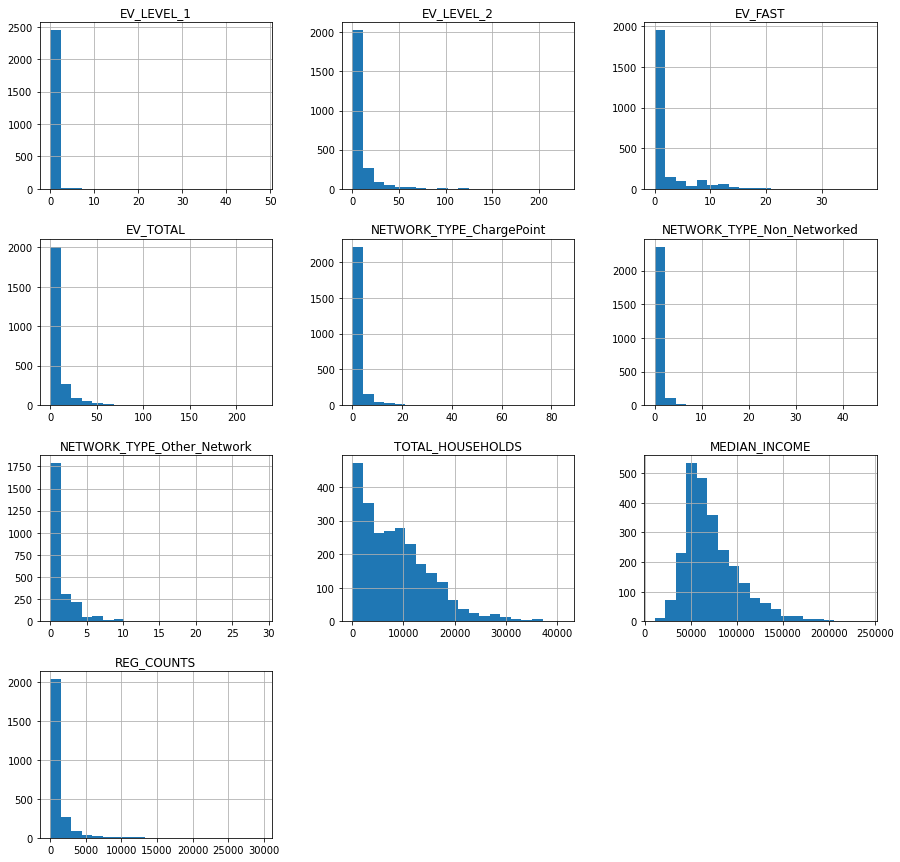

In [6]:
model_df.hist(bins=20, figsize=(15,15))
plt.show

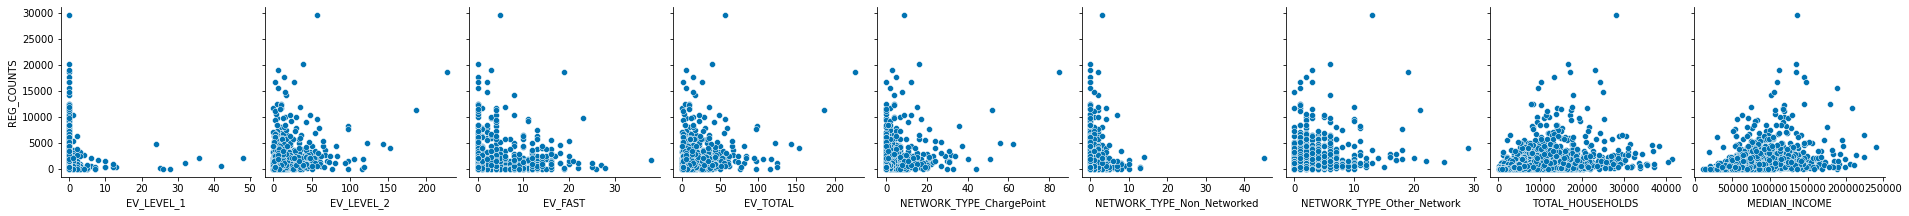

In [7]:
sns.set_palette('colorblind')
sns.pairplot(data=model_df,
             y_vars=['REG_COUNTS'],
             x_vars=['EV_LEVEL_1', 'EV_LEVEL_2', 'EV_FAST', 'EV_TOTAL',
                    'NETWORK_TYPE_ChargePoint',	'NETWORK_TYPE_Non_Networked',	'NETWORK_TYPE_Other_Network',
                    'TOTAL_HOUSEHOLDS',	'MEDIAN_INCOME'],
             height=3)

In [8]:
corr_matrix = model_df.corr()
corr_matrix['REG_COUNTS'].sort_values(ascending=False)

REG_COUNTS                    1.000000
MEDIAN_INCOME                 0.384177
EV_LEVEL_2                    0.340083
EV_TOTAL                      0.331250
TOTAL_HOUSEHOLDS              0.329099
NETWORK_TYPE_Other_Network    0.328102
NETWORK_TYPE_ChargePoint      0.288295
EV_FAST                       0.127180
NETWORK_TYPE_Non_Networked    0.037561
EV_LEVEL_1                   -0.007052
Name: REG_COUNTS, dtype: float64

# Scaling & Normalization

In [9]:
scaler = StandardScaler()

In [10]:
scaled_data = scaler.fit_transform(model_df)

In [11]:
scaled_df = pd.DataFrame(scaled_data, index=model_df.index, columns=model_df.columns)
scaled_df.head()

,EV_LEVEL_1,EV_LEVEL_2,EV_FAST,EV_TOTAL,NETWORK_TYPE_ChargePoint,NETWORK_TYPE_Non_Networked,NETWORK_TYPE_Other_Network,TOTAL_HOUSEHOLDS,MEDIAN_INCOME,REG_COUNTS
ZIP_CODE,,,,,,,,,,
03266,-0.135267,-0.435815,-0.447048,-0.444879,-0.419604,0.205462,-0.616256,-1.133061,-0.600555,-0.502067
07001,-0.135267,-0.505870,-0.447048,-0.513320,-0.419604,0.205462,-0.616256,-0.523715,-0.109084,-0.411929
07003,-0.135267,0.264737,0.855840,0.239529,0.410448,0.205462,0.643028,1.456548,0.160083,-0.085245
07004,-0.135267,-0.155594,0.334685,-0.171116,-0.419604,0.205462,0.223267,-0.874480,1.607992,-0.341591
07005,-0.135267,-0.505870,2.158729,-0.513320,-0.419604,0.205462,-0.196495,-0.455491,1.275291,-0.269689


In [12]:
y = scaled_df.REG_COUNTS
y.shape

(2493,)

In [13]:
X = scaled_df.drop(['REG_COUNTS'], axis=1)
X.shape

(2493, 9)

# Linear Regression

Early version of linear regression model using one feature to make target predictions. This section was used to test the viability of the dataset and model.

In [14]:
X_scaled = scaled_df.EV_TOTAL.values.reshape(-1,1)

In [15]:
# Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

In [16]:
# Train the model using the training sets
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

In [17]:
# Make predictions using the testing set
y_pred = lin_model.predict(X_test)
print(y_pred.shape)

(823,)


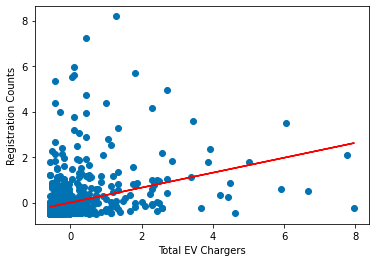

In [18]:
plt.scatter(X_test, y_test)
plt.xlabel('Total EV Chargers')
plt.ylabel('Registration Counts')
plt.plot(X_test, y_pred, color='red')
plt.show()

In [19]:
# The coefficients
print("Coefficients: \n", lin_model.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficients: 
 [0.32814752]
Mean squared error: 0.82
Coefficient of determination: 0.11


# Multivariable Linear Regression

Advanced version of linear regression model using all features in the dataset. This early work was used to develop the final version of the model.

In [20]:
multi_X = scaled_df[['EV_LEVEL_1', 'EV_LEVEL_2', 'EV_FAST', 'EV_TOTAL',
                    'NETWORK_TYPE_ChargePoint',	'NETWORK_TYPE_Non_Networked',	'NETWORK_TYPE_Other_Network',
                    'TOTAL_HOUSEHOLDS',	'MEDIAN_INCOME']]

# multi_X = model_df[['EV_LEVEL_2', 'EV_FAST']]

multi_X.shape

(2493, 9)

In [21]:
# Split the data into training/testing sets
multi_X_train, multi_X_test, multi_y_train, multi_y_test = train_test_split(multi_X, y, test_size=0.33, random_state=42)

In [22]:
# Train the model using the training sets
multi_lin = LinearRegression()
multi_lin.fit(multi_X_train, multi_y_train)

LinearRegression()

In [23]:
# Make predictions using the testing set
multi_y_pred = multi_lin.predict(multi_X_test)
print(multi_y_pred.shape)

(823,)


# Performance

In [24]:
# intercept
print('Intercept:', multi_lin.intercept_)
# The coefficients
print("Coefficients: \n", multi_lin.coef_)
# explained variance score
print("Explained Variance Score: %.2f \n" % explained_variance_score(multi_y_test, multi_y_pred))
# Max Error
print("Max Error: %.2f \n" % max_error(multi_y_test, multi_y_pred))
# Mean Absolute Error
print("Mean Absolute Error: %.2f \n" % mean_absolute_error(multi_y_test, multi_y_pred))
# The mean squared error
print("Mean Squared error: %.2f \n" % mean_squared_error(multi_y_test, multi_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(multi_y_test, multi_y_pred))

Intercept: -0.005543530641394393
Coefficients: 
 [ 2.80845787e+11  1.94237201e+12  3.72314453e-03 -1.98819102e+12
  3.04794312e-01  2.12402344e-02  2.06245422e-01  2.27378845e-01
  3.47946167e-01]
Explained Variance Score: 0.32 

Max Error: 6.74 

Mean Absolute Error: 0.41 

Mean Squared error: 0.63 

Coefficient of determination: 0.32


#Visualizing Predictions

In [25]:
predictions_df = pd.DataFrame(multi_y_pred, index=multi_X_test.index, columns=["REG_PREDICT"])

In [26]:
predictions_df.head()

,REG_PREDICT
ZIP_CODE,
97914,-0.528766
97138,-0.410243
55411,-0.427996
97420,-0.128072
49426,0.246269


In [27]:
ml_out_df = multi_X_test.merge(predictions_df, how='left', on='ZIP_CODE')

In [28]:
ml_out_df

,EV_LEVEL_1,EV_LEVEL_2,EV_FAST,EV_TOTAL,NETWORK_TYPE_ChargePoint,NETWORK_TYPE_Non_Networked,NETWORK_TYPE_Other_Network,TOTAL_HOUSEHOLDS,MEDIAN_INCOME,REG_PREDICT
ZIP_CODE,,,,,,,,,,
97914,-0.135267,-0.575926,1.637573,-0.581760,-0.419604,-0.472972,-0.196495,-0.388435,-1.007906,-0.528766
97138,-0.135267,-0.155594,1.637573,-0.171116,-0.212091,-0.472972,0.223267,-0.619259,-0.762614,-0.410243
55411,-0.135267,-0.365760,-0.447048,-0.376438,-0.004578,-0.472972,-0.616256,0.125221,-1.054176,-0.427996
97420,0.833758,-0.295705,-0.186470,-0.171116,-0.212091,0.883897,0.223267,0.441800,-0.765212,-0.128072
49426,-0.135267,-0.575926,2.419307,-0.581760,-0.212091,-0.472972,-0.196495,0.570653,0.402645,0.246269
...,...,...,...,...,...,...,...,...,...,...
10547,-0.135267,-0.435815,-0.447048,-0.444879,-0.212091,-0.472972,-0.616256,-0.889235,1.233822,0.084810
12723,-0.135267,-0.435815,-0.447048,-0.444879,-0.212091,-0.472972,-0.616256,-1.158042,-0.597398,-0.613477
97411,-0.135267,-0.155594,1.637573,-0.171116,-0.419604,0.205462,0.643028,-0.761551,-1.237182,-0.569994


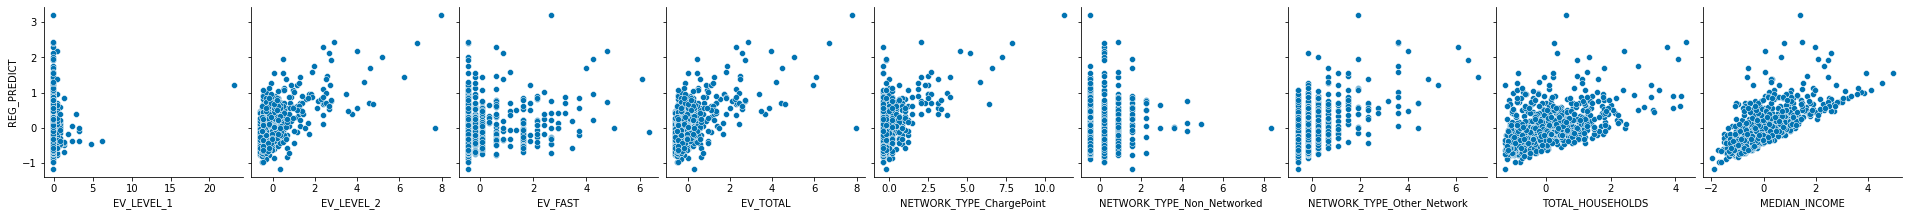

In [29]:
sns.set_palette('colorblind')
sns.pairplot(data=ml_out_df,
             y_vars=['REG_PREDICT'],
             x_vars=['EV_LEVEL_1', 'EV_LEVEL_2', 'EV_FAST', 'EV_TOTAL',
                    'NETWORK_TYPE_ChargePoint',	'NETWORK_TYPE_Non_Networked',	'NETWORK_TYPE_Other_Network',
                    'TOTAL_HOUSEHOLDS',	'MEDIAN_INCOME'],
             height=3)